# LINEAR REGRESSION ASSIGNMENT 

## Bike Sharing Case Study 

### Problem statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company found it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. The company wants to know:

> Which variables are significant in predicting the demand for shared bikes.

> How well those variables describe the bike demands 

## Step 1: Reading and Understanding the dataset

In [1]:
# supress warnings:
import warnings
warnings.filterwarnings('ignore')

##### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

##### Reading the dataset

In [3]:
bike = pd.read_csv('day.csv')

##### Understanding the dataset

In [4]:
# checking the SIZE of dataset, that are, rows and columns:
bike.shape

(730, 16)

In [5]:
# checking INFO of dataset:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


--------- there are 16 columns with various data types like int64, object and float64 ---------

In [6]:
# checking top rows of the dataset for better understanding:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# describing the columns of dataframe:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# checking for null values in the dataset:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

------- there are no null values in the dataset --------

In [9]:
# checking for duplicates if any:
bike.drop_duplicates(inplace=True)

In [10]:
# re-checking the shape of the dataset after dropping:
bike.shape

(730, 16)

------ as the shape of the dataset after dropping of duplicates still same as before, therefore, this means there were no duplicate values in the dataset -------

##### Removing the unwanted columns
> 'instant' - it has only index value for the row, therefore it's not necessary 

> 'dteday' - it has the date, but since we already have year and month column, it's not required

> 'casual' & 'registered' - it is the breakup of cnt column based on category and is not needed

In [11]:
bike.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

##### Mapping the season column

In [12]:
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

##### Mapping the mnth column

In [13]:
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

##### Mapping the weekday column

In [14]:
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

##### Mapping the weathersit column

In [15]:
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

##### Re-checking the dataset

In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# checking the column info of the dataset:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## Step 2: Visualizing the dataset
Visualizing and Analyzing the data using 'matplotlib' and 'seaborn'

##### Visualizing the numeric columns

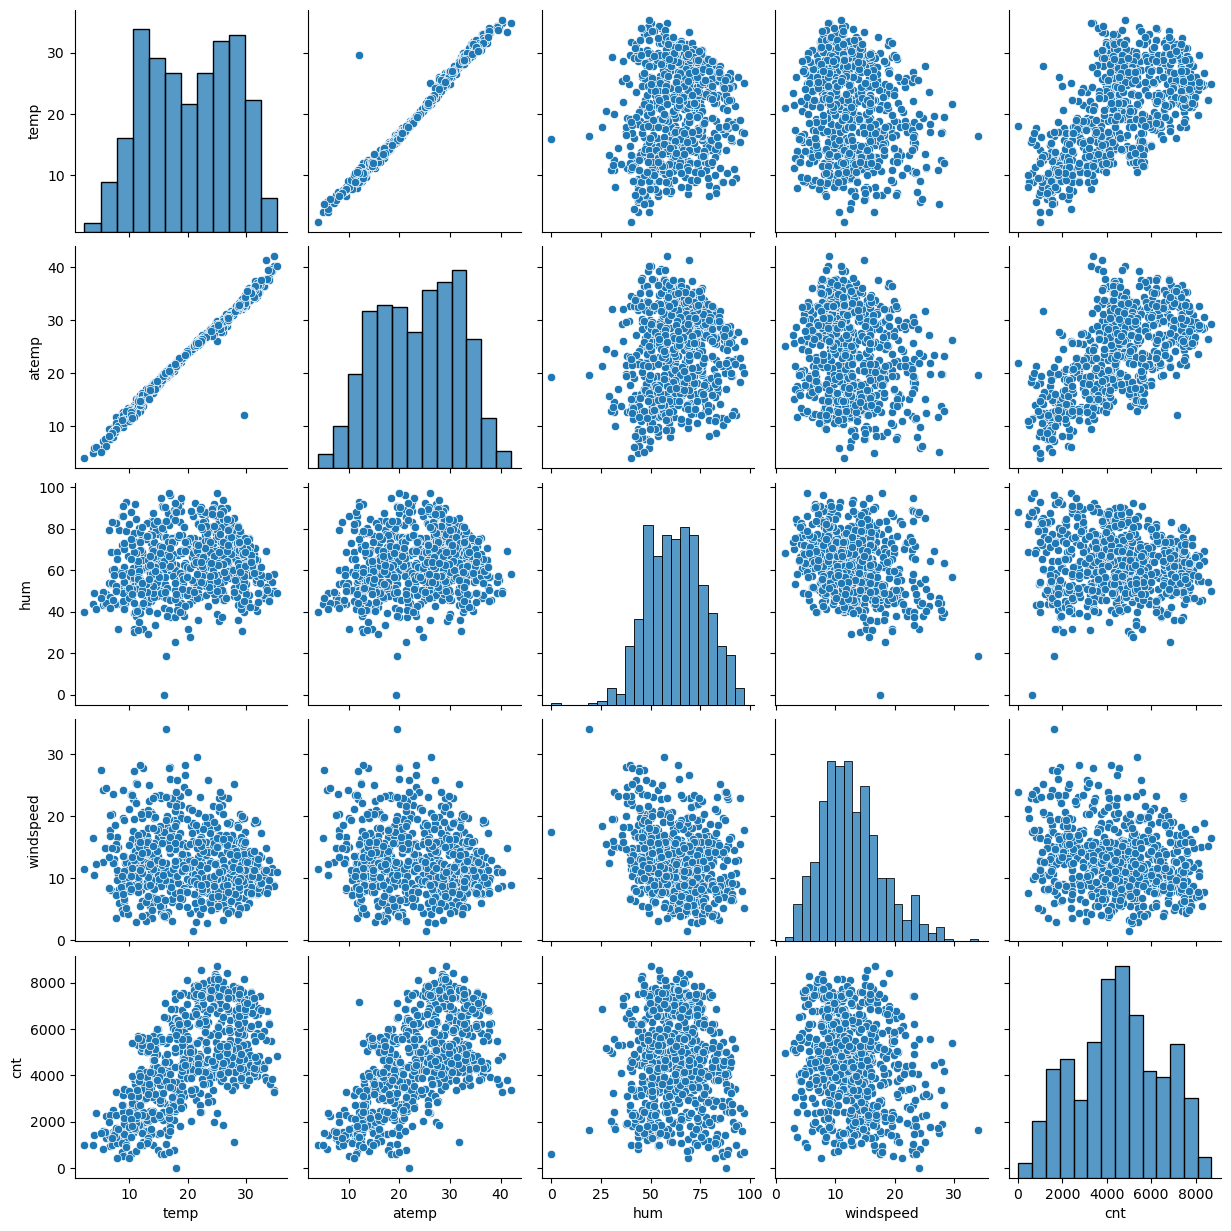

In [18]:
sns.pairplot(data=bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

##### Visualizing the categorical columns using the target variable

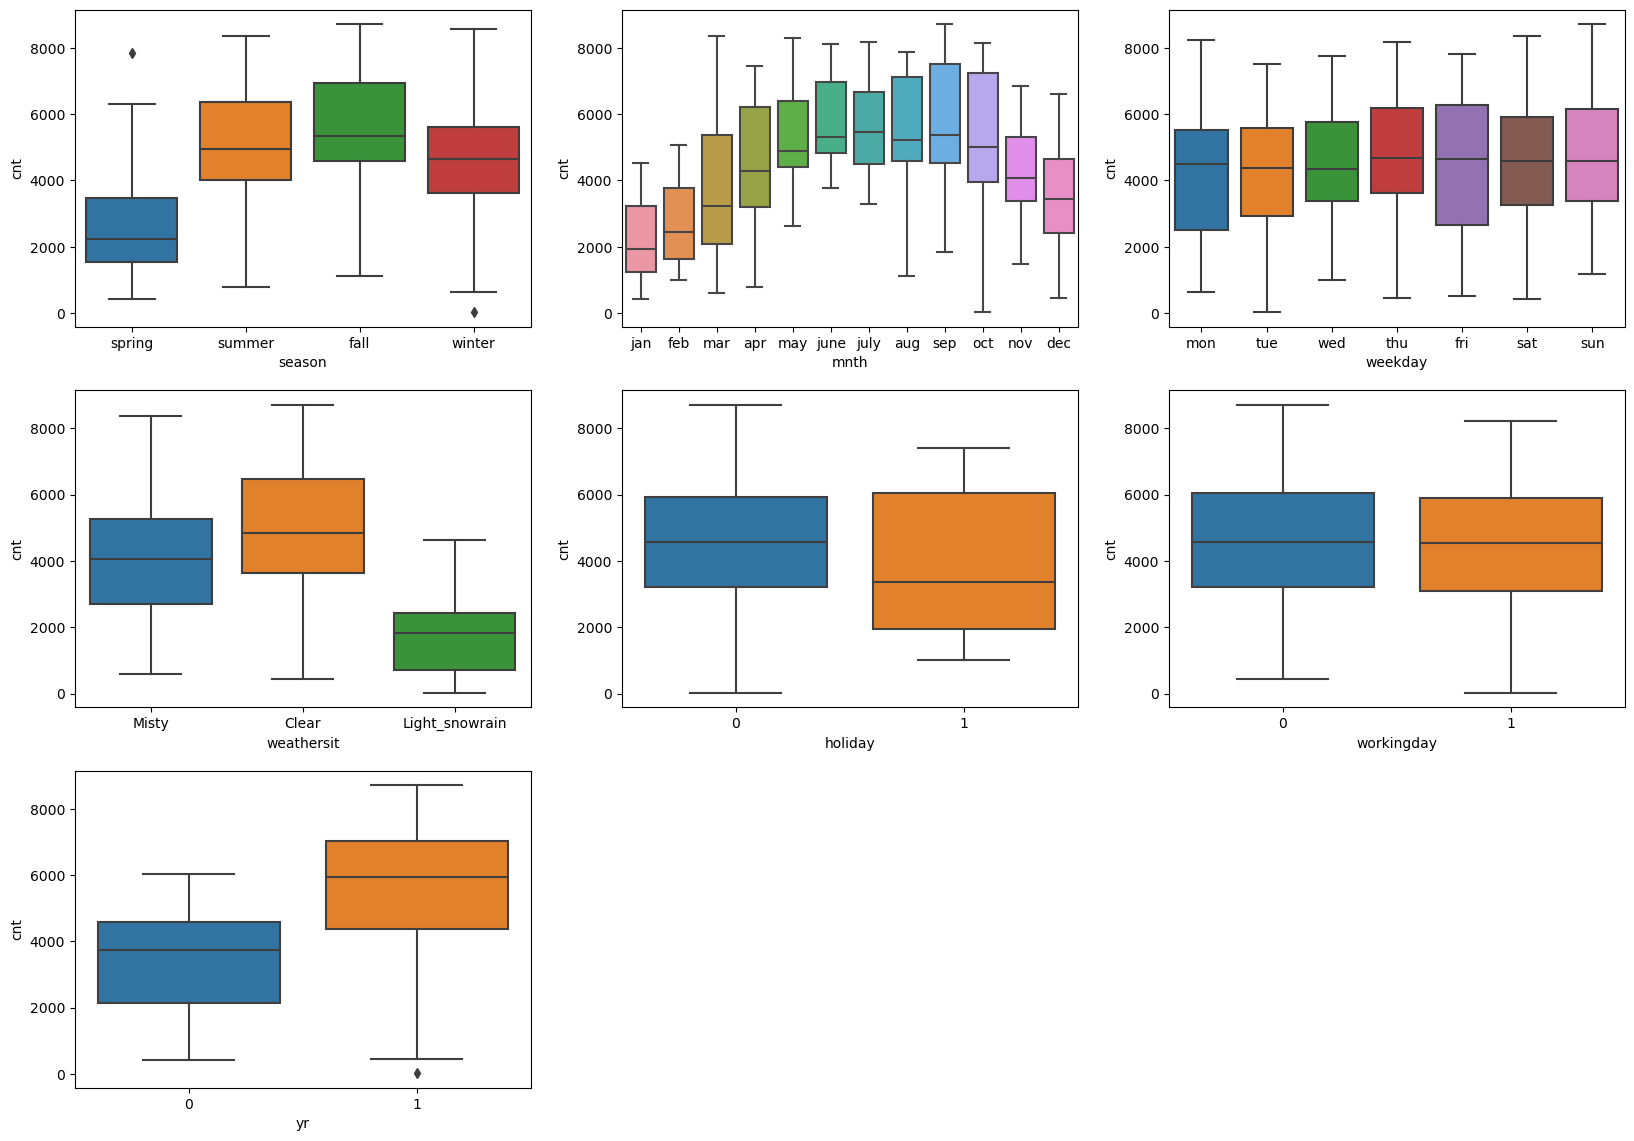

In [19]:
plt.figure(figsize=(20, 14))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

##### Defining function to create barplot for categorical columns

In [20]:
def cat_col(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data = bike)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',hue='yr',data = bike,palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

##### Visualizing season column

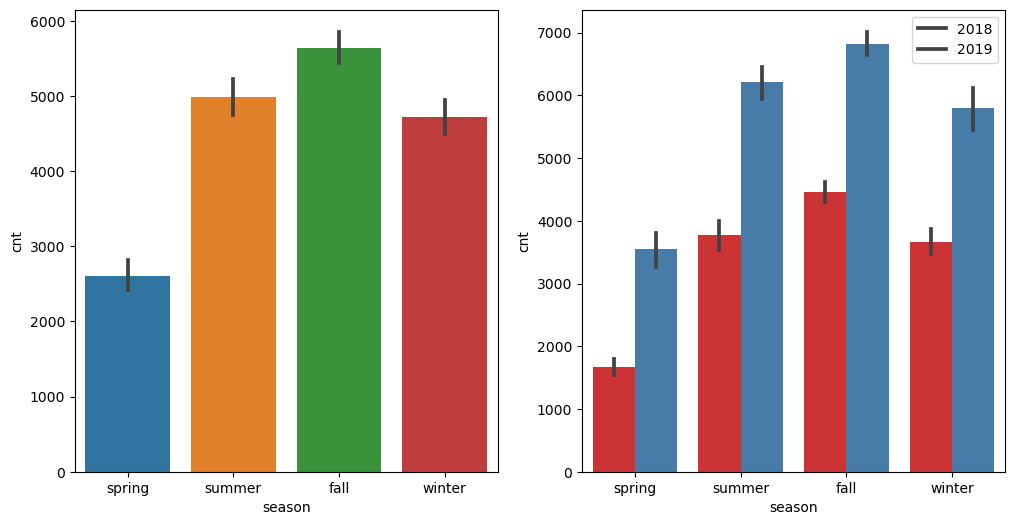

In [21]:
cat_col('season')

------ Fall season seems to have attracted more bookings. Also, in each season the booking seems to have increased from 2018 to 2019 ------ 

##### Mnth column

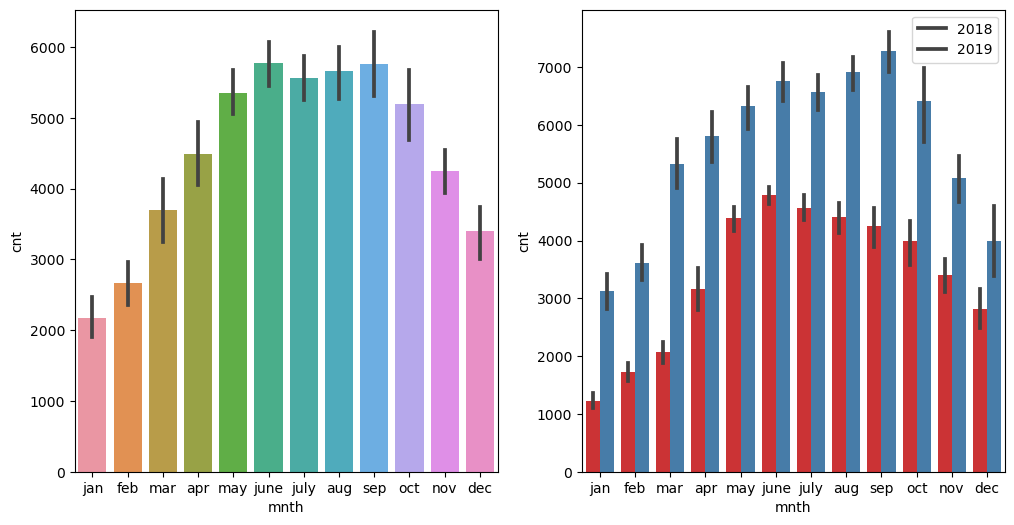

In [22]:
cat_col('mnth')

----- Most of the bookings have been done during the month of JUNE in the year 2018 and in SEPT in the year 2019. Booking seems to be increasing from the start of the year till mid and then drastically decreasing as the end of year approaches -----

##### Weathersit column

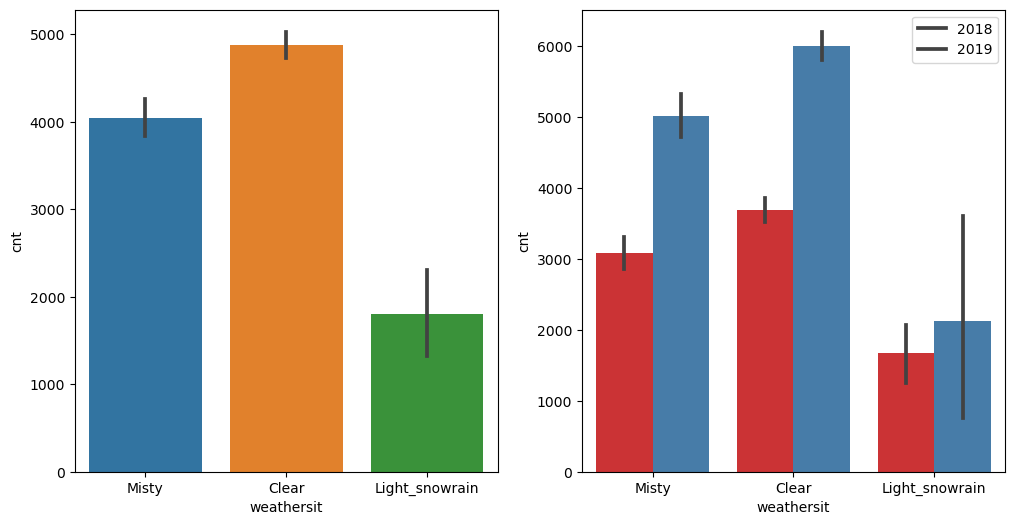

In [23]:
cat_col('weathersit')

----- Clear weather, ofcourse, attracted more bookings as compared to misty and light_snowrain weather. Obviously, more bookings were made in year 2019 as compared to year 2018 -----

##### Weekday column

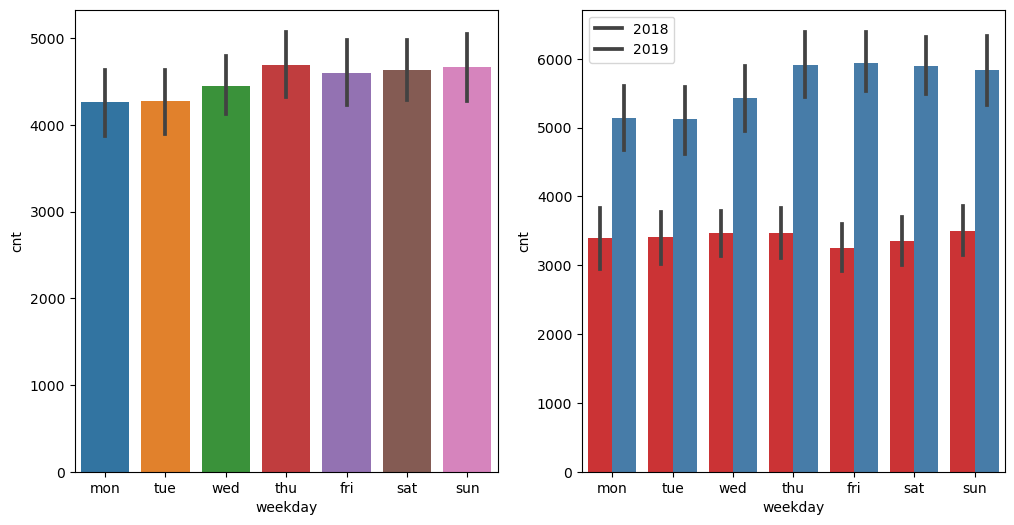

In [24]:
cat_col('weekday')

----- In the year 2019, Thursday and Friday had more number of bookings comparatively ------

##### Holiday column

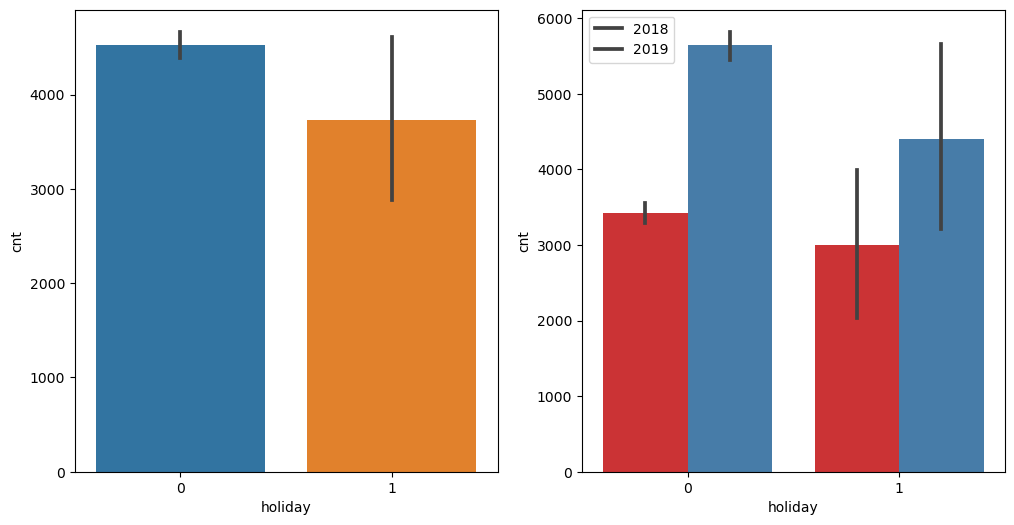

In [25]:
cat_col('holiday')

----- When it's holiday, there seems to be less bookings as compared to non-holiday days -----

##### Working day column

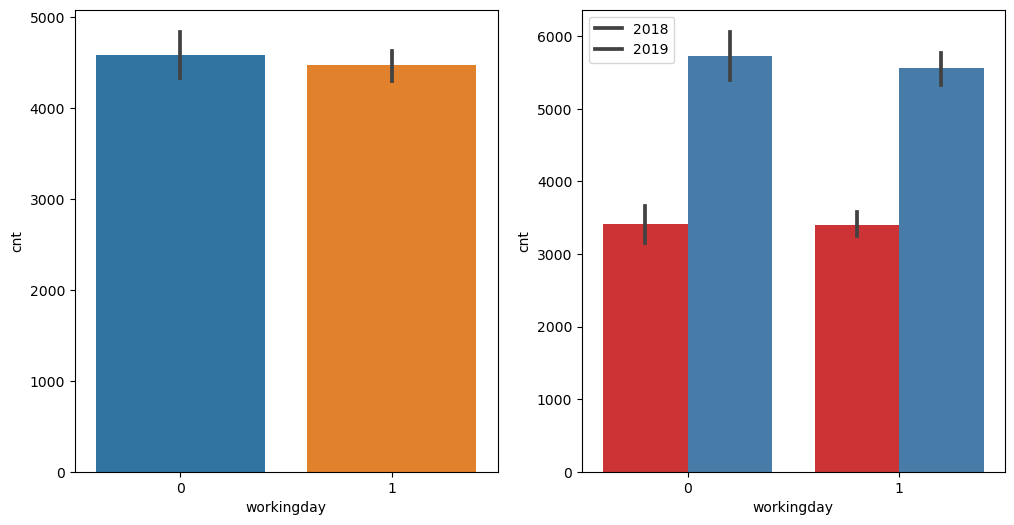

In [26]:
cat_col('workingday')

----- Bookings seem to be almost equal on both working and non-working day. But the total count of bookings increased from year 2018 to 2019 -----

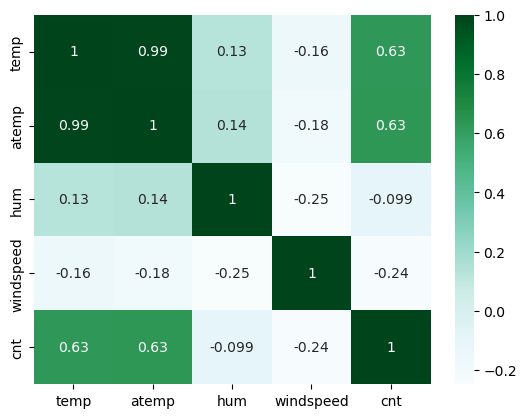

In [27]:
# checking the correlation between the numerical variables:
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

----- There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables -----

## Step 4: Data Preparation

#### Creating Dummy Variables
We will create dummy variables for 4 categorical columns - 'mnth', 'weekday', 'season', 'weathersit'.

In [28]:
mnth_bike=pd.get_dummies(bike.mnth,drop_first=True)
weekdays_bike=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_bike=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_bike=pd.get_dummies(bike.season,drop_first=True)

In [29]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
# merging the dataframe with the dummy variable dataset:
bike_new = pd.concat([bike,mnth_bike,weekdays_bike,weathersit_bike,seasons_bike],axis=1)

In [31]:
# checking the new dataset:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [32]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [33]:
# dropping unnecessary columns as we have already created dummy variable out of it:
bike_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [34]:
# checking the new dataset:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
# checking the size of new dataset:
bike_new.shape

(730, 30)

In [36]:
# checking the column info of new dataset:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

## Step 4: Splitting the data into Training and Test Sets
The first basic step of regression is performing Training-Test Split.

In [37]:
# splitting the dataframe into Train and Test (70:30 ratio):
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

----- We specify this so that the train and test data set always have the same rows, respectively -----

In [38]:
# checking the shape of training datatset:
bike_train.shape

(510, 30)

In [39]:
# checking the shape of testing datatset:
bike_test.shape

(220, 30)

##### Rescaling the Features
There are two common ways of rescaling: Min-Max Scaling and Standardization 

In [40]:
# using MinMaxScaler for Rescaling the features:
scaler = MinMaxScaler()

In [41]:
# verifying the head of dataset before scaling:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


In [42]:
# applying scaler() to all the columns except the 'yes-no' and 'dummy' variables:
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [43]:
# verifying the head after appying scaling:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


In [44]:
# describing the dataset:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


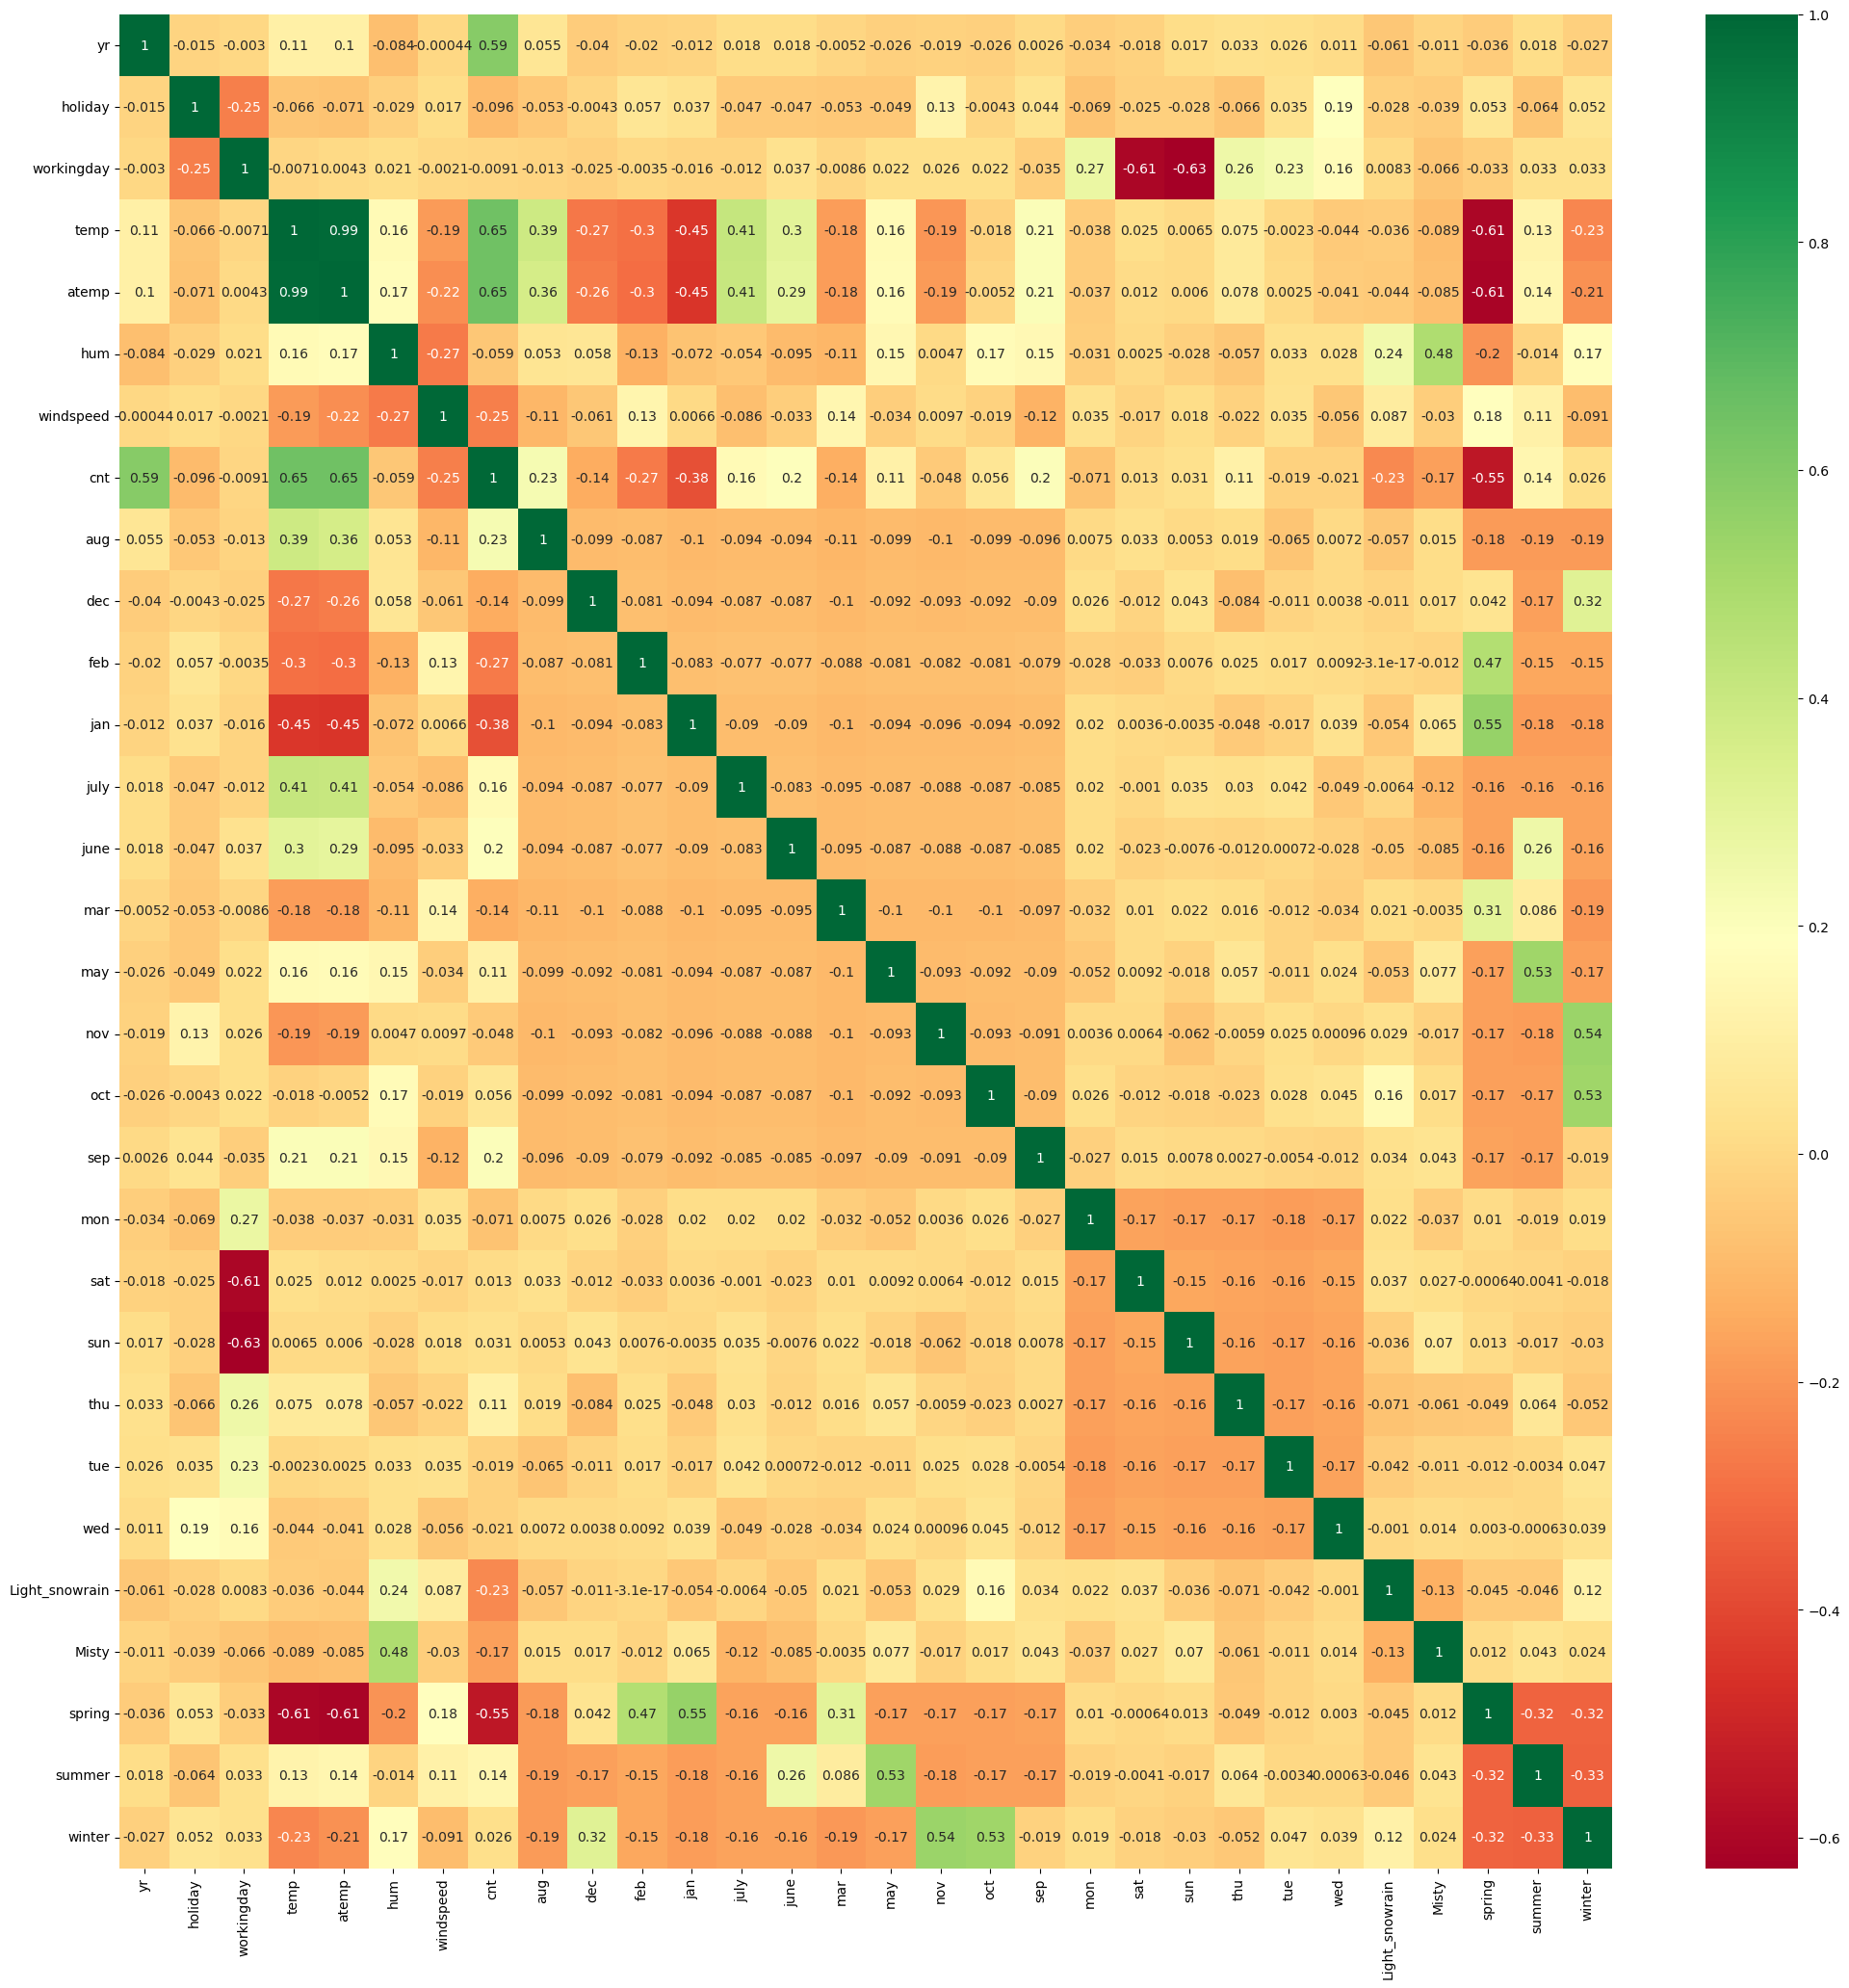

In [45]:
# checking the correlation coefficients to see which variables are highly correlated:
plt.figure(figsize = (25,25))
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

> Winter shows good correlation with Nov and Oct months, whereas Summer shows good correlation with May.

> Spring have good correlation with Feb and Jan.

> Misty and Humidity also show good correlation.

> cnt also seems to have good correlation with Year and Temp.

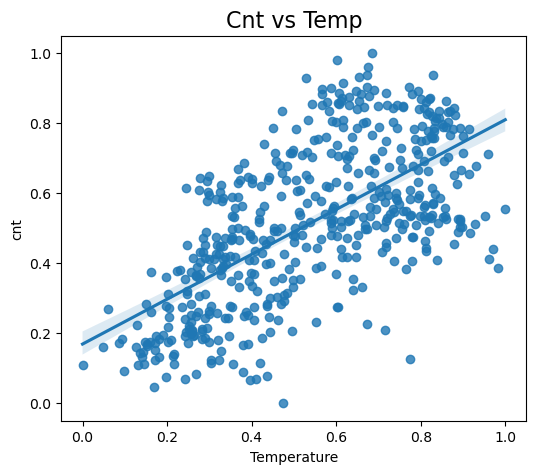

In [46]:
# visualizing one of the correlation to see the trends:
plt.figure(figsize=(6,5))
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike_train,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

------ Demand for bikes is positively correlated with Temp -------

### Dividing into X and Y sets for the model building

In [47]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### > Recursive Feature Elimination
RFE is a feature selection technique that recursively removes features, fits a model, and then evaluates the performance until the desired number of features is reached.

In [48]:
# create a Linear Regression Model:
lm = LinearRegression()

# fit the model to the training data:
lm.fit(X_train, y_train)

# create an RFE object:
rfe = RFE(lm, n_features_to_select=15)

# fit the RFE model to the training data:
rfe = rfe.fit(X_train, y_train)

In [49]:
# list of variables selected in top 15 list:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [50]:
# selecting the selected variable via RFE in column list:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [51]:
# let's check which columns are rejected:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

### > Variance Inflation Factor
VIF or Variance Inflation Factor is a measure that quantifies how much a variable is contributing to the variance of a model. It is used to detect multicollinearity among predictor variables in a regression analysis. 

In [52]:
# defining function to calculate VIF of variables:
def calcVIF(bike):
    vif = pd.DataFrame()
    vif['Features'] = bike.columns
    vif['VIF'] = [variance_inflation_factor(bike.values, i) for i in range(bike.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [53]:
# dataframe with RFE selected variables:
X_train_rfe = X_train[col]

In [54]:
# calculating VIF:
calcVIF(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,yr,2.09
8,nov,1.85
6,jan,1.75


----- Humidity(hum) shows high VIF value of 30.89 ------

## Step 5: Building Linear Model with the help of statsmodel

### MODEL 1:

In [55]:
# building 1st linear regression model:
# adding a constant to the features because statsmodels does not add a constant term (intercept) by default:
X_train_lm1 = sm.add_constant(X_train_rfe)

# fitting the linear model:
lr1 = sm.OLS(y_train,X_train_lm1).fit()

# printing the model summary:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          8.15e-189
Time:                        21:44:56   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

#### > ADJUSTMENT 1 (hum column)
As 'hum' column have high VIF value, hence we'll drop it. High Variance Inflation Factor (VIF) values indicate that a predictor variable is highly correlated with other predictor variables in the model. Multicollinearity, as indicated by high VIF, can have several negative effects on the linear regression model.

In [56]:
# dropping 'hum' column:
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# running the function to calculate VIF for the new model:
calcVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,yr,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,Misty,1.57


### MODEL 2:

In [57]:
# building 2nd linear regression model:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          4.75e-186
Time:                        21:44:57   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

----- 'nov' column shows high p-value -----

#### > ADJUSTMENT 2 (nov column)
As 'nov' column has high p-value, hence we can drop it. A high p-value indicates that the predictor variable is not statistically significant in predicting the target variable. A simpler model with fewer variables is often easier to interpret. If a variable has a high p-value, it might not contribute meaningfully to the interpretation of the model.

In [58]:
# dropping 'nov' column:
X_train_new = X_train_new.drop(['nov'], axis = 1)

# running the function again to calculate VIF for the new model:
calcVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,yr,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,Misty,1.57
7,sep,1.34


### MODEL 3:

In [59]:
# building 3rd linear regression model:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          2.74e-186
Time:                        21:44:57   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

#### > ADJUSTMENT 3 (dec column)
Dropping 'dec' column as it shows high p-value

In [60]:
# dropping 'dec' column:
X_train_new = X_train_new.drop(['dec'], axis = 1)

# running the function again to calculate VIF for the new model:
calcVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


### MODEL 4:

In [61]:
# building 4th linear regression model:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          8.14e-187
Time:                        21:44:57   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

#### ADJUSTMENT 4 (jan column)
Dropping 'jan' column due to high p-value

In [62]:
# dropping 'jan' column:
X_train_new = X_train_new.drop(['jan'], axis = 1)

# running the function again to calculate VIF for the new model:
calcVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


### MODEL 5:

In [63]:
# building 5th linear regression model:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          5.06e-187
Time:                        21:44:57   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

#### > ADJUSTMENT 5 (july column)
Dropping 'july' column due to high p-value

In [64]:
# dropping 'july' column:
X_train_new = X_train_new.drop(['july'], axis = 1)

# running the function again to calculate VIF for the new model:
calcVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


### MODEL 6:

In [65]:
# building 6th linear regression model:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train,X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.47e-186
Time:                        21:44:57   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

#### > ADJUSTMENT 6(spring column)

In [66]:
# dropping 'spring' column:
X_train_new = X_train_new.drop(['spring'], axis = 1)

# running the function again to calculate VIF for the new model:
calcVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
7,summer,1.57
6,Misty,1.48
8,winter,1.37
4,sep,1.20
5,Light_snowrain,1.08
1,holiday,1.04


### MODEL 7:

In [67]:
# building 7th linear regression model:
X_train_lm7 = sm.add_constant(X_train_new)
lr7 = sm.OLS(y_train,X_train_lm7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          2.83e-186
Time:                        21:44:57   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1259      0.017      7.

> ----- Here p-value is almost accepted. It seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant. 

> We can select 'Model 7' as our final model as it has all important statistics (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi colinear (high VIF) variables.

> Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model ------

In [68]:
# checking the parameters and their coefficient values for MODEL 7, that is, 'lr7':
lr7.params

const             0.125926
yr                0.232861
holiday          -0.098685
temp              0.548008
windspeed        -0.153246
sep               0.101195
Light_snowrain   -0.282869
Misty            -0.078375
summer            0.088080
winter            0.129345
dtype: float64

## Step 6: Residual Analysis of the Train data
Residual analysis is an essential step in evaluating the performance of a regression model. It involves examining the differences between the predicted and actual values (residuals) to ensure that the model assumptions are met.

In [69]:
X_train_lm7

,const,yr,holiday,temp,windspeed,sep,Light_snowrain,Misty,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,1,0


In [70]:
# making predictions and calculating residuals:
y_train_pred = lr7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

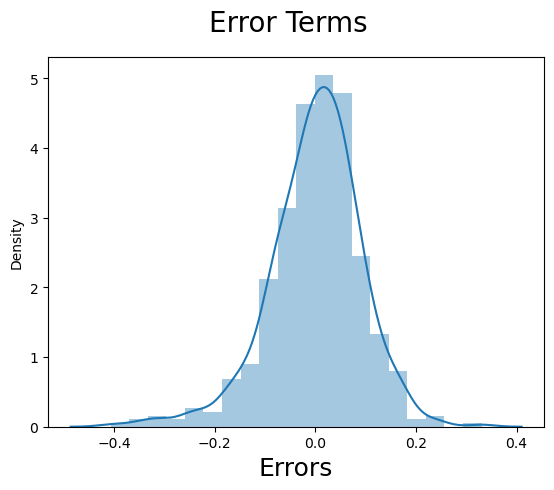

In [71]:
# visualizing the residuals, that is, plotting the histogram of the error terms:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

----- From the above histogram, we may conclude that the Residuals are normally distributed. Hence, our assumption for Linear Regression is valid ------

In [72]:
calcVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
7,summer,1.57
6,Misty,1.48
8,winter,1.37
4,sep,1.20
5,Light_snowrain,1.08
1,holiday,1.04


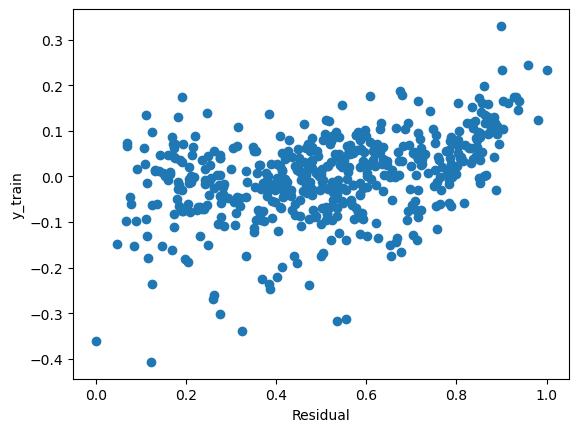

In [73]:
residual = (y_train - y_train_pred)
plt.scatter(y_train, residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

------ A scatter plot of residuals against y-train ideally shows no pattern -----

### Multicollinearity Check

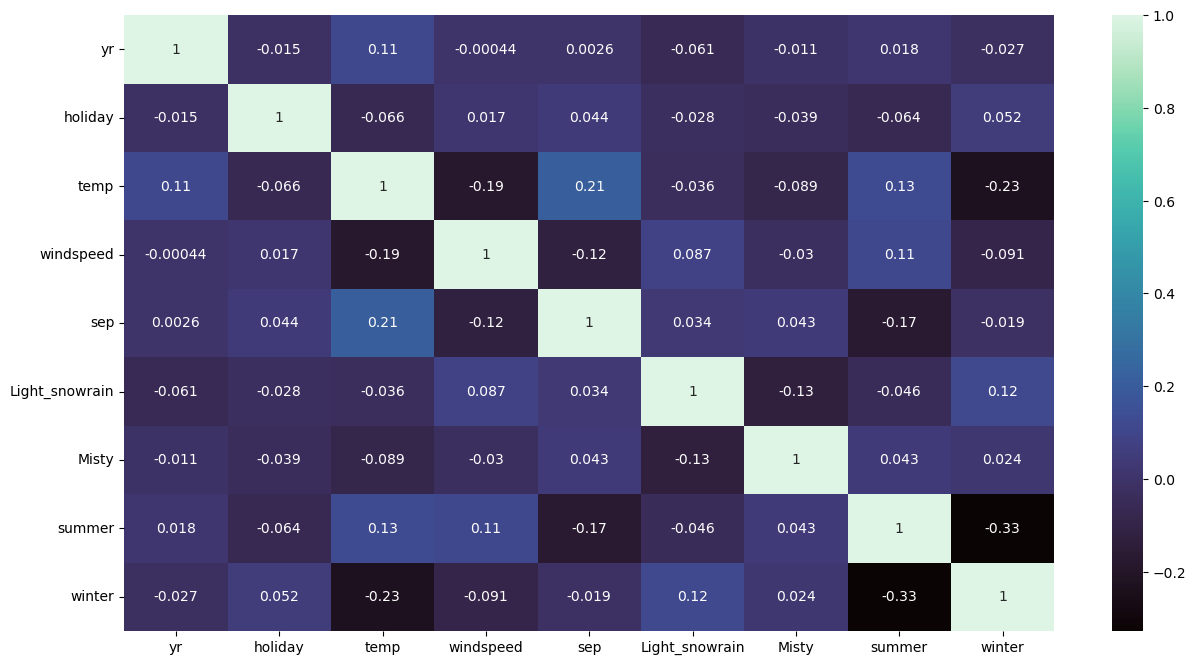

In [74]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap='mako')
plt.show()

------ VIF values are less than 5 and also there is no multicolinearity as seen from the heatmap ------

## Step 7: Making Predictions using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model, that is, 6th model.

In [75]:
# applying scaling on the test dataset:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [76]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [77]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [78]:
col1 = X_train_new.columns

X_test = X_test[col1]

# adding constant variable to test dataframe:
X_test_lm7 = sm.add_constant(X_test)

In [79]:
# making predictions using the 7th model:
y_pred = lr7.predict(X_test_lm7)

In [80]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7942

## Step 8: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

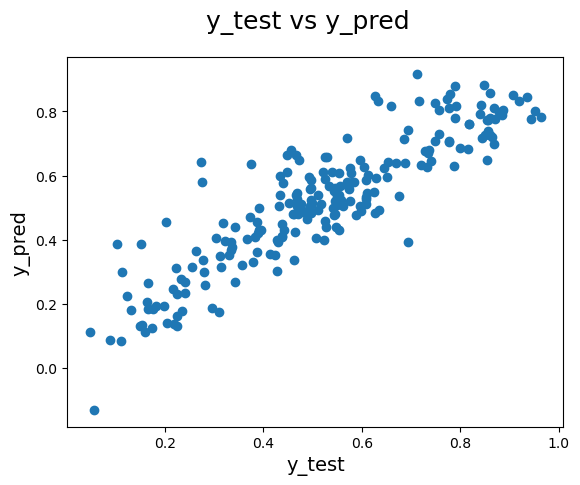

In [81]:
# plotting y_test and y_pred to understand the spread:

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 18)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred', fontsize = 14)   

In [82]:
# calculating Adjusted-R^2 value for the test dataset:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7854


In [83]:
round(lr7.params,4)

const             0.1259
yr                0.2329
holiday          -0.0987
temp              0.5480
windspeed        -0.1532
sep               0.1012
Light_snowrain   -0.2829
Misty            -0.0784
summer            0.0881
winter            0.1293
dtype: float64

## > Interpretation of Coefficients:
- const : The Constant value of ‘0.1259’ indicated that, in the absence of all other predictor variables, the bike rental can still increase by 0.1259 units.
- yr : A coefficient value of ‘0.2329’ indicated that a unit increase in year variable increases the bike booking numbers by 0.2329 units.
- holiday : A coefficient value of ‘-0.0987 indicated that, a unit increase in holiday variable, decreases the bike hiring numbers by 0.0987 units.
- temp : A coefficient value of ‘0.5480’ indicated that a unit increase in temp variable, increases the bike hiring numbers by 0.5480 units.
- windspeed : A coefficient value of ‘-0.1532’ indicated that a unit increase in windspeed variable decreases the bike hiring numbers by 0.1532 units.
- sep : A coefficient value of ‘0.1012’ indicated that, a unit increase in Sep variable increases the bike hiring numbers by 0.1012 units.
- Light_snowrain : A coefficient value of ‘-0.2829’ indicated that a unit increase in Light_snowrain variable, decreases the bike hiring numbers by 0.2829 units.
- Misty : A coefficient value of ‘-0.0784’ indicated that, a unit increase in Misty variable decreases the bike hiring numbers by 0.0784 units.
- summer : A coefficient value of ‘0.0881’ indicated that a unit increase in Summer variable increase the bike hiring numbers by 0.0881 units.
- winter : A coefficient value of ‘0.1293’ indicated that a unit increase in Winter variable increases the bike hiring numbers by 0.1293 units.

#### We can see that the equation of our best fitted line is:
> cnt = 0.1259 + 0.2329 x yr - 0.0987 x holiday + 0.5480 x temp - 0.1532 x windspeed + 0.1012 x sep - 0.2829 x Light_snowrain - 0.0784 x Misty + 0.0881 x summer + 0.1293 x winter

## > Comparison between Train and Test datasets:
- Train dataset R^2          : 0.830
- Test dataset R^2           : 0.7942
- Train dataset Adjusted R^2 : 0.827    
- Test dataset Adjusted R^2  : 0.7854


## > Based on the Model, demand for shared bikes is affected by:
- temperature(temp) 
- year(yr) - it is evident that there was an increase in booking of shared bikes in year 2019 as compared to 2018.
- season(summer and fall) - more bookings were done in summer and fall season comparatively.
- weathersit(clear or misty) - people avoided renting bikes during light snow & rain, instead preferred clear and misty weather.